In [1]:
# imports
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([train, test], ignore_index=True)

In [5]:
print(train.shape, test.shape, df.shape)

(1460, 81) (1459, 80) (2919, 81)


In [6]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [8]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
x = df.drop('SalePrice',1)
y = df.SalePrice


In [11]:
#check how many uniques in each catagories
for col_name in x.columns:
    if x[col_name].dtypes == 'object':
        unique_cat = len(x[col_name].unique())
        print("Features '{col_name}' has {unique_cat} unique catagories".format(
                col_name = col_name, unique_cat=unique_cat))

Features 'Alley' has 3 unique catagories
Features 'BldgType' has 5 unique catagories
Features 'BsmtCond' has 5 unique catagories
Features 'BsmtExposure' has 5 unique catagories
Features 'BsmtFinType1' has 7 unique catagories
Features 'BsmtFinType2' has 7 unique catagories
Features 'BsmtQual' has 5 unique catagories
Features 'CentralAir' has 2 unique catagories
Features 'Condition1' has 9 unique catagories
Features 'Condition2' has 8 unique catagories
Features 'Electrical' has 6 unique catagories
Features 'ExterCond' has 5 unique catagories
Features 'ExterQual' has 4 unique catagories
Features 'Exterior1st' has 16 unique catagories
Features 'Exterior2nd' has 17 unique catagories
Features 'Fence' has 5 unique catagories
Features 'FireplaceQu' has 6 unique catagories
Features 'Foundation' has 6 unique catagories
Features 'Functional' has 8 unique catagories
Features 'GarageCond' has 6 unique catagories
Features 'GarageFinish' has 4 unique catagories
Features 'GarageQual' has 6 unique cata

In [19]:
#for high amount of catagories investigate
x.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64

In [20]:
others = [key if val < 100 else 'other' for key, val in x.Exterior1st.value_counts().items()]  

In [22]:
x.Exterior1st = x.Exterior1st.apply(lambda x: 'other' if x in others else x)

In [23]:
x.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
other       243
Plywood     221
CemntBd     126
Name: Exterior1st, dtype: int64

In [24]:
x.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [26]:
others = []
others = [key if val < 100 else 'other' for key, val in x.Exterior2nd.value_counts().items()]  

In [27]:
x.Exterior2nd = x.Exterior2nd.apply(lambda x: 'other' if x in others else x)

In [30]:
x.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [31]:
x.SaleType = x.SaleType.apply(lambda x : 'other' if x != 'WD' else x)

In [34]:
todummy_list = [col for col in x.columns if x[col].dtypes == 'object']

In [35]:
todummy_list

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [36]:
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x,1)
        df = pd.concat([df,dummies], axis=1)
    return df

In [37]:
X = dummy_df(x,todummy_list)

In [38]:
X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_WD,SaleType_other,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,0,1,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,0,1,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,0,1,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,0,1,0,0,1,1,0


In [40]:
X.isnull().sum().sort_values(ascending=False)

LotFrontage            486
GarageYrBlt            159
MasVnrArea              23
BsmtFullBath             2
BsmtHalfBath             2
BsmtFinSF1               1
BsmtFinSF2               1
BsmtUnfSF                1
GarageArea               1
GarageCars               1
TotalBsmtSF              1
Electrical_FuseP         0
ExterCond_Fa             0
Electrical_Mix           0
Electrical_SBrkr         0
ExterCond_Ex             0
Electrical_FuseF         0
Utilities_NoSeWa         0
Electrical_FuseA         0
ExterCond_Po             0
ExterCond_TA             0
ExterQual_Ex             0
ExterQual_Fa             0
ExterQual_Gd             0
ExterCond_Gd             0
Condition2_PosN          0
Condition2_RRNn          0
Condition2_RRAn          0
Condition2_RRAe          0
Exterior1st_CemntBd      0
                      ... 
MSZoning_C (all)         0
LotShape_Reg             0
LotShape_IR3             0
LotShape_IR2             0
LotShape_IR1             0
LotConfig_Inside         0
L

In [42]:
#impute missing values using median
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values ='NaN', strategy='median', axis=0)
imp.fit(X)
X=pd.DataFrame(data=imp.transform(X), columns = X.columns)

In [43]:
X.isnull().sum().sort_values(ascending=False).head(10)

Utilities_NoSeWa    0
Condition2_PosA     0
ExterCond_TA        0
ExterCond_Po        0
ExterCond_Gd        0
ExterCond_Fa        0
ExterCond_Ex        0
Electrical_SBrkr    0
Electrical_Mix      0
Electrical_FuseP    0
dtype: int64

In [47]:
def find_outliers_turkey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indicies = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_indicies])
    return outlier_indicies, outlier_values

In [48]:
turkey_indecies, turkey_values = find_outliers_turkey(X['1stFlrSF'])

In [50]:
#Outlier detection with Kernel Density Estimation
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred=kde.evaluate(x_scaled)
    
    n= sum(pred<0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]
    
    return outlier_ind, outlier_value

In [53]:
kde_outlier_ind, kde_outlier_value = find_outliers_kde(X['1stFlrSF'])

In [54]:
kde_outlier_value

array([ 3820.,  5095.,  4692.,  2898.,  3228.,  3138.,  2726.,  2696.,
        2674.,  2633.,   334.,  2552.,  2524.,  2522.,  2515.,  2497.,
        2492.,  2490.,  2338.,  2362.,  2364.,  2365.,  2470.,  2464.,
        2392.,  2402.,  2452.,  2411.,  2444.,  2422.,  2290.,  2279.,
        2276.,  2259.,  2234.,  2234.,   372.,  2223.,  2217.,  2207.,
        2200.,  2196.,  2158.,  2156.,  2151.,   407.,  2140.,  2136.,
        2129.,  2122.,  2121.,  2117.,  2113.,  2110.,  2097.,  2084.,
         432.,  2079.,  2076.,  2073.,  2071.,  2069.,  2069.,  2064.,
         438.,  2063.,  2053.,   442.,  2048.,  2046.,  2046.,  2042.,
        2042.,  2039.,  2036.,  2036.,  2036.,  2034.,  2032.,   448.,
        2028.,  2020.,  2020.,  2020.,  2018.,  2014.,   453.,  2006.,
        2000.,  2000.,  2000.,  1992.,  1987.,  1980.,  1978.,  1978.,
        1976.,  1973.,  1968.,  1967.,  1966.,  1966.,  1964.,  1960.,
        1959.,  1950.,  1949.,  1944.,  1943.])

In [55]:
turkey_values

[2207.0,
 2223.0,
 2259.0,
 2158.0,
 2234.0,
 2392.0,
 2402.0,
 3228.0,
 3138.0,
 2515.0,
 2444.0,
 2217.0,
 2364.0,
 2898.0,
 2524.0,
 2411.0,
 2196.0,
 4692.0,
 2156.0,
 2633.0,
 2696.0,
 2522.0,
 2674.0,
 2452.0,
 2492.0,
 2200.0,
 2490.0,
 2365.0,
 2464.0,
 2470.0,
 2276.0,
 3820.0,
 2338.0,
 2234.0,
 2552.0,
 2290.0,
 2362.0,
 2497.0,
 2422.0,
 5095.0,
 2726.0,
 2279.0]

In [56]:
#histograms
%matplotlib inline
import matplotlib.pyplot as plt

def plot_hist(x):
    plt.hist(x, color='gray', alpha = 0.5)
    plt.title("Histogram of {title}".format(title=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


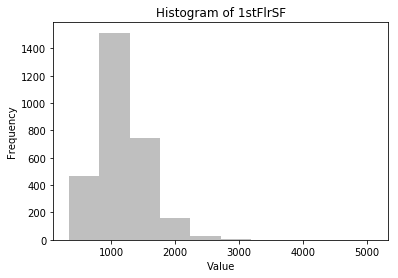

In [57]:
plot_hist(X['1stFlrSF'])

In [58]:
def plot_hist_dv(x,y):
    plt.hist(list(x[y==0]),alpha = 0.5, label='DV=0')
    plt.hist(list(x[y==1]),alpha = 0.5, label='DV=1')
    
    

In [59]:
#interactions between features
#possible to do 2 and 3 way interactions
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures


In [60]:
def add_interactions(df):
    #get feature names
    combos = list(combinations(list(df.columns),2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    #find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias = False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    #Remove iteractions with terms with all 0 values
    noint_indicies = [i for i, x in enumerate(list((df==0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df


In [61]:
X = add_interactions(X)
X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_WD_Street_Grvl,SaleType_WD_Street_Pave,SaleType_WD_Utilities_AllPub,SaleType_other_Street_Grvl,SaleType_other_Street_Pave,SaleType_other_Utilities_AllPub,SaleType_other_Utilities_NoSeWa,Street_Grvl_Utilities_AllPub,Street_Pave_Utilities_AllPub,Street_Pave_Utilities_NoSeWa
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [63]:
#time to build a model
# from sklearn.cross_validation import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [82]:
y_train = y.loc[y.isnull() == False]
y_test = y.loc[y.isnull() == True]

In [88]:

X_train_pca = X_pca.ix[y_train.index]
X_train = X.ix[y_train.index]
X_test_pca = X_pca.ix[y_test.index]
X_test = X.ix[y_test.index]

In [89]:
print(X_train_pca.shape, X_test_pca.shape)

(1460, 10) (1459, 10)


In [142]:
#feature selection
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=40)
selected_features = select.fit(X_train, y_train)
indicies_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indicies_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]


c:\python\python35\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [   85    95   156 ..., 25185 25188 25200] are constant.
  UserWarning)
c:\python\python35\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
c:\python\python35\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [143]:
colnames_selected

['MasVnrType_BrkCmn_SaleCondition_Alloca',
 'MasVnrType_BrkFace_Neighborhood_MeadowV',
 'MasVnrType_BrkFace_SaleCondition_Alloca',
 'MasVnrType_None_Neighborhood_Blmngtn',
 'MasVnrType_None_Neighborhood_NridgHt',
 'MasVnrType_Stone_Neighborhood_SawyerW',
 'MasVnrType_Stone_SaleCondition_Alloca',
 'MiscFeature_Gar2_Neighborhood_NAmes',
 'MiscFeature_Gar2_PavedDrive_Y',
 'MiscFeature_Gar2_RoofStyle_Hip',
 'MiscFeature_Shed_Neighborhood_Crawfor',
 'MiscFeature_Shed_Neighborhood_Timber',
 'MiscFeature_Shed_PavedDrive_P',
 'MiscFeature_Shed_SaleCondition_Alloca',
 'Neighborhood_Crawfor_SaleCondition_Alloca',
 'Neighborhood_Crawfor_SaleCondition_Partial',
 'Neighborhood_IDOTRR_RoofStyle_Gambrel',
 'Neighborhood_IDOTRR_SaleCondition_Alloca',
 'Neighborhood_MeadowV_SaleCondition_Abnorml',
 'Neighborhood_Mitchel_SaleCondition_Alloca',
 'Neighborhood_NoRidge_PoolQC_Ex',
 'Neighborhood_NoRidge_RoofMatl_WdShngl',
 'Neighborhood_OldTown_RoofMatl_WdShngl',
 'Neighborhood_OldTown_SaleCondition_Alloca

In [93]:
y_train.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [96]:
#build model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)


MSE of feature selection 3.695334036509356e-12


In [97]:
preds = model.predict(X_train)
print("MSE of feature selection {}".format(mean_squared_error(preds, y_train)))


MSE of feature selection 3.695334036509356e-12


In [128]:
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
new_preds = model_pca.predict(X_train_pca)
print("MSE of feature selection {}".format(mean_squared_error(new_preds, y_train)))


MSE of feature selection 2325489188.220964


In [130]:
test_preds_pca = model_pca.predict(X_test_pca)
results_pca = pd.DataFrame(test_preds_pca)
results_pca.index = y_test.index +1
results_pca = results_pca.rename(columns={0:"SalePrice"})
results_pca.index.rename('Id', inplace=True)
results_pca.to_csv("linear_regression_pca_results.csv")


In [134]:
results_pca.to_csv("linear_regression_pca_results.csv")

In [133]:
results_pca.SalePrice = results_pca['SalePrice'].apply(lambda x: 0 if x<0 else x)

In [99]:
test_preds = model.predict(X_test)

In [100]:
results = pd.DataFrame(test_preds)

In [101]:
results.index = y_test.index

In [108]:
results = results.rename(columns={0:"SalePrice"})


TypeError: 'str' object is not callable

In [114]:
results.index.rename('Id', inplace=True)
results.index = results.index+1

In [115]:
results.to_csv("linear_regression_results.csv")

In [116]:
results.isnull().sum()

SalePrice    0
dtype: int64

In [117]:
results.SalePrice.describe()

count    1.459000e+03
mean     1.898311e+05
std      1.699639e+05
min     -8.526865e+05
25%      1.086354e+05
50%      1.715501e+05
75%      2.524455e+05
max      2.795494e+06
Name: SalePrice, dtype: float64

In [122]:
results.SalePrice = results.SalePrice.apply(lambda x: 0 if x < 0 else x)

In [123]:
results.to_csv("linear_regression_results.csv")

In [144]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( n_estimators=200,
                                max_depth=5,
                                min_samples_leaf = 100,
                                n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [145]:
preds = forest.predict(X_train)
print("MSE of feature selection {}".format(mean_squared_error(preds, y_train)))


MSE of feature selection 1451699297.1792698


In [146]:
np.sqrt(1451699297.1792698)

38101.171860971284

In [147]:
test_preds = forest.predict(X_test)
results = pd.DataFrame(test_preds)
results.index = y_test.index +1
results = results.rename(columns={0:"SalePrice"})
results.index.rename('Id', inplace=True)
results.to_csv("forest_regression_results.csv")

In [139]:
#forest with pca
forest.fit(X_train_pca, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [140]:
preds = forest.predict(X_train_pca)
print("MSE of feature selection {}".format(mean_squared_error(preds, y_train)))

MSE of feature selection 2834573143.247222


In [141]:
np.sqrt(2834573143.247222)

53240.709454769873